# HW3
Name: Chen Ling Chuang <br>
Github Username: dana-Chuang <br>
USC ID: 8432390527
### Package Import

In [56]:
import os
import pandas as pd
import numpy as np
from scipy.stats import bootstrap

## 1. Time Series Classification Part 1: Feature Creation/Extraction
An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.
#### (a) Data Download
Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.
- - - 
When I run the following code in order to get all the data, I realize that there are some minor errors in dataset itself:
- dataset14.csv in cycling has an extra comma in the end. 
- dataset9.csv in cycling has an extra comma in the end. 
So I remove the extra commas manually. 

In [57]:
activities = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
data_activities = pd.DataFrame()
num_csv = 0 #for double check
for i in activities:
    folder_path = f'../data/AReM/{i}'
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            # print('reading ', folder_path, file_name)
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path, skiprows= 4)
            df.rename(columns = {'# Columns: time':'time'}, inplace = True) #rename column name
            data_activities = pd.concat([data_activities, df])
            num_csv += 1
            
print('done reading ', num_csv, ' csv files')
print(data_activities)

done reading  88  csv files
       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0         0      42.00       0.00      18.50       0.50      12.00       0.00
1       250      42.00       0.00      18.00       0.00      11.33       0.94
2       500      42.75       0.43      16.75       1.79      18.25       0.43
3       750      42.50       0.50      16.75       0.83      19.00       1.22
4      1000      43.00       0.82      16.25       0.83      18.00       0.00
..      ...        ...        ...        ...        ...        ...        ...
475  118750      31.50       1.66      12.50       3.20      14.25       4.44
476  119000      27.33       1.25      11.33       0.94      20.00       4.00
477  119250      37.80       7.68      14.20       2.48      17.25       0.83
478  119500      33.75       1.30      15.75       5.21      16.50       2.69
479  119750      32.67       3.09      18.67       0.47      14.00       3.16

[42239 rows x 7 columns]


#### (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.
Thus, I handle bending 1 and 2 with other activities separately.

In [58]:
# testing data for bending 1 and 2
# pretty much the same as what I did above
df_bending_test = pd.DataFrame()
for i in range(1,3): #1,2
    for j in range(1,3): #1,2
        file_path = f'../data/AReM/bending{i}/dataset{j}.csv'
        df = pd.read_csv(file_path, skiprows= 4)
        df.rename(columns = {'# Columns: time':'time'}, inplace = True)
        df_bending_test = pd.concat([df_bending_test, df])
df_bending_test

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,39.25,0.43,22.75,0.43,33.75,1.30
1,250,39.25,0.43,23.00,0.00,33.00,0.00
2,500,39.25,0.43,23.25,0.43,33.00,0.00
3,750,39.50,0.50,23.00,0.71,33.00,0.00
4,1000,39.50,0.50,24.00,0.00,33.00,0.00
...,...,...,...,...,...,...,...
475,118750,23.00,0.71,11.25,2.49,26.75,1.92
476,119000,22.25,0.43,15.50,0.87,29.50,1.50
477,119250,23.75,0.43,17.67,0.47,25.67,3.09
478,119500,24.25,0.43,13.33,1.25,30.00,2.45


In [59]:
df_bending_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       1920 non-null   int64  
 1   avg_rss12  1920 non-null   float64
 2   var_rss12  1920 non-null   float64
 3   avg_rss13  1920 non-null   float64
 4   var_rss13  1920 non-null   float64
 5   avg_rss23  1920 non-null   float64
 6   var_rss23  1920 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 120.0 KB


In [60]:
# training data for bending 1 and 2
# as the number of csv files in bending 1 and 2 are different. I handle them separately.
df_bending_train = pd.DataFrame()

# bending 1
for i in range(3,8): #3-7
    file_path = f'../data/AReM/bending1/dataset{i}.csv'
    df = pd.read_csv(file_path, skiprows= 4)
    df.rename(columns = {'# Columns: time':'time'}, inplace = True)
    df_bending_train = pd.concat([df_bending_train, df]) 

# bending 2
for i in range(3,7): #3-6
    file_path = f'../data/AReM/bending2/dataset{i}.csv'
    df = pd.read_csv(file_path, skiprows= 4)
    df.rename(columns = {'# Columns: time':'time'}, inplace = True)
    df_bending_train = pd.concat([df_bending_train, df])  
    
df_bending_train

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,42.00,0.71,21.25,0.43,30.00,0.00
1,250,41.50,0.50,20.25,1.48,31.25,1.09
2,500,41.50,0.50,14.25,1.92,33.00,0.00
3,750,40.75,0.83,15.75,0.43,33.00,0.00
4,1000,40.00,0.71,20.00,2.74,32.75,0.43
...,...,...,...,...,...,...,...
475,118750,27.00,0.00,14.00,0.00,6.50,0.50
476,119000,27.00,0.00,15.00,0.00,4.00,1.00
477,119250,27.00,0.00,14.25,0.83,4.00,2.00
478,119500,27.00,0.00,13.33,1.25,1.50,0.50


In [61]:
df_bending_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       4320 non-null   object 
 1   avg_rss12  3840 non-null   float64
 2   var_rss12  3840 non-null   float64
 3   avg_rss13  3840 non-null   float64
 4   var_rss13  3840 non-null   float64
 5   avg_rss23  3840 non-null   float64
 6   var_rss23  3840 non-null   float64
dtypes: float64(6), object(1)
memory usage: 270.0+ KB


But then I realize that there are something wrong with bending training data. The Dtype of column 'time' becomes object but it is expected to be int64. Hence, I take a closer look and realize that dataset4.csv in bending2 has wrong format (each data is separated with space instead of comma). 
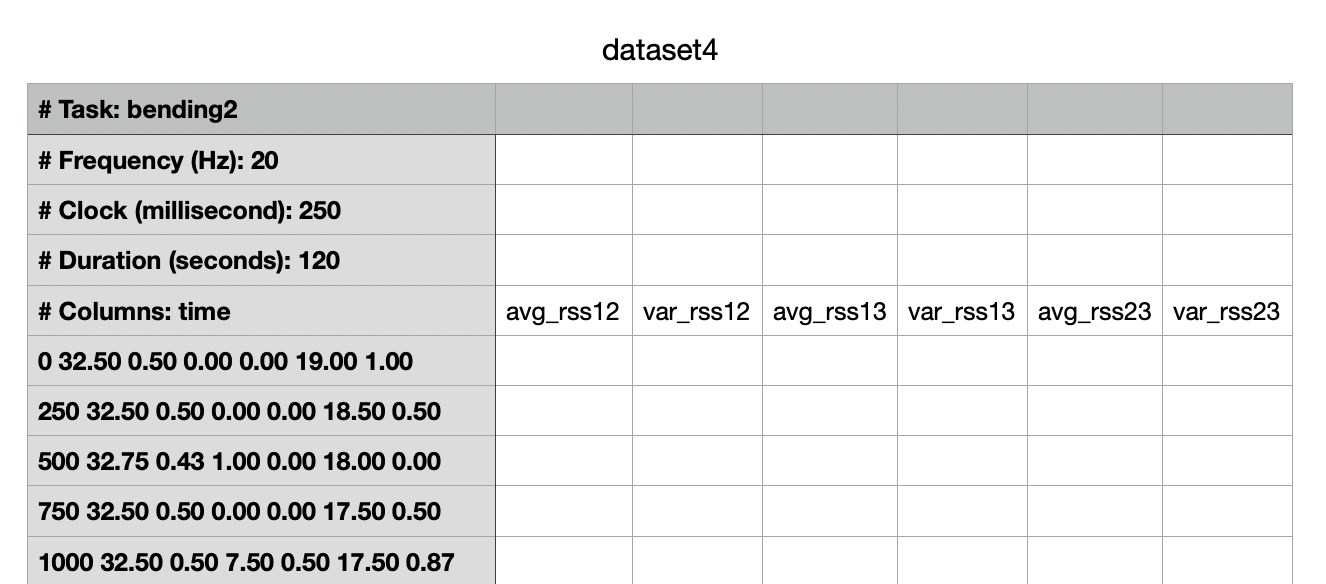

In [62]:
# do it again. this time handling the case of dataset4.csv incorrect format
# training data for bending 1 and 2
df_bending_train = pd.DataFrame()

# bending 1
for i in range(3,8): #3-7
    file_path = f'../data/AReM/bending1/dataset{i}.csv'
    df = pd.read_csv(file_path, skiprows= 4)
    df.rename(columns = {'# Columns: time':'time'}, inplace = True)
    df_bending_train = pd.concat([df_bending_train, df]) 

# bending 2, dataset3.csv
file_path = f'../data/AReM/bending2/dataset3.csv'
df = pd.read_csv(file_path, skiprows= 4)
df.rename(columns = {'# Columns: time':'time'}, inplace = True)
df_bending_train = pd.concat([df_bending_train, df])

# bending2, dataset4.csv
file_path = f'../data/AReM/bending2/dataset4.csv'
df = pd.read_csv(file_path,
                 skiprows= 5, 
                 header= None, # since columns are separated by comma, dont read header but add it manually later
                 names = df_bending_train.columns.tolist(),
                 delim_whitespace=True # since data is separated by space
                )
df.rename(columns = {'# Columns: time':'time'}, inplace = True)
df_bending_train = pd.concat([df_bending_train, df])

# the rest dataset in bending2
for i in range(5,7): #5-6
    file_path = f'../data/AReM/bending2/dataset{i}.csv'
    df = pd.read_csv(file_path, skiprows= 4)
    df.rename(columns = {'# Columns: time':'time'}, inplace = True)
    df_bending_train = pd.concat([df_bending_train, df])  
    
df_bending_train 

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,42.00,0.71,21.25,0.43,30.00,0.00
1,250,41.50,0.50,20.25,1.48,31.25,1.09
2,500,41.50,0.50,14.25,1.92,33.00,0.00
3,750,40.75,0.83,15.75,0.43,33.00,0.00
4,1000,40.00,0.71,20.00,2.74,32.75,0.43
...,...,...,...,...,...,...,...
475,118750,27.00,0.00,14.00,0.00,6.50,0.50
476,119000,27.00,0.00,15.00,0.00,4.00,1.00
477,119250,27.00,0.00,14.25,0.83,4.00,2.00
478,119500,27.00,0.00,13.33,1.25,1.50,0.50


In [63]:
df_bending_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       4320 non-null   int64  
 1   avg_rss12  4320 non-null   float64
 2   var_rss12  4320 non-null   float64
 3   avg_rss13  4320 non-null   float64
 4   var_rss13  4320 non-null   float64
 5   avg_rss23  4320 non-null   float64
 6   var_rss23  4320 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 270.0 KB


Now comes to the rest activities.

In [64]:
# testing data for the rest activities
# pretty much the same as what I did above
other_activities = [activity for activity in activities if activity not in ['bending1', 'bending2']]
df_other_test = pd.DataFrame()
for i in other_activities: 
    for j in range(1,4): #1-3
        file_path = f'../data/AReM/{i}/dataset{j}.csv'
        df = pd.read_csv(file_path, skiprows= 4)
        df.rename(columns = {'# Columns: time':'time'}, inplace = True)
        df_other_test = pd.concat([df_other_test, df])
df_other_test

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,32.00,4.85,17.50,3.35,22.50,3.20
1,250,40.50,1.12,14.00,2.24,21.75,1.30
2,500,40.50,2.60,11.33,4.50,18.25,5.31
3,750,34.50,1.50,20.67,2.87,19.00,2.83
4,1000,34.50,1.50,21.25,3.27,18.25,4.38
...,...,...,...,...,...,...,...
475,118750,36.00,2.45,17.00,5.10,20.50,0.87
476,119000,34.33,1.89,15.00,2.45,17.00,2.12
477,119250,33.00,7.35,14.60,3.14,13.00,5.70
478,119500,31.67,1.25,11.00,6.16,19.25,2.17


In [65]:
df_other_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       7200 non-null   int64  
 1   avg_rss12  7200 non-null   float64
 2   var_rss12  7200 non-null   float64
 3   avg_rss13  7200 non-null   float64
 4   var_rss13  7200 non-null   float64
 5   avg_rss23  7200 non-null   float64
 6   var_rss23  7200 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 450.0 KB


In [66]:
# training data for the rest activities
df_other_train = pd.DataFrame()

for i in other_activities: 
    for j in range(4,16): #4-15
        file_path = f'../data/AReM/{i}/dataset{j}.csv'
        df = pd.read_csv(file_path, skiprows= 4)
        df.rename(columns = {'# Columns: time':'time'}, inplace = True)
        df_other_train = pd.concat([df_other_train, df])
    
df_other_train

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,40.50,2.60,17.25,3.90,15.50,3.28
1,250,35.50,1.50,19.75,1.30,18.50,3.77
2,500,35.25,1.30,13.67,6.13,18.50,0.50
3,750,35.25,3.90,14.75,3.27,21.25,1.79
4,1000,32.25,2.49,10.67,6.60,15.50,4.39
...,...,...,...,...,...,...,...
475,118750,34.50,6.18,9.00,3.56,12.67,4.19
476,119000,25.75,6.02,13.75,2.05,16.00,1.58
477,119250,31.50,3.35,10.25,5.12,16.25,2.95
478,119500,33.75,2.77,14.00,3.24,13.75,0.43


In [67]:
df_other_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28799 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       28799 non-null  int64  
 1   avg_rss12  28799 non-null  float64
 2   var_rss12  28799 non-null  float64
 3   avg_rss13  28799 non-null  float64
 4   var_rss13  28799 non-null  float64
 5   avg_rss23  28799 non-null  float64
 6   var_rss23  28799 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.8 MB


Realized that there is one data missing (only 28799 training data but it suppose to have 28800). Look one step closer and realize that there is a row missing in dataset8.csv in sitting: when time= 13500.
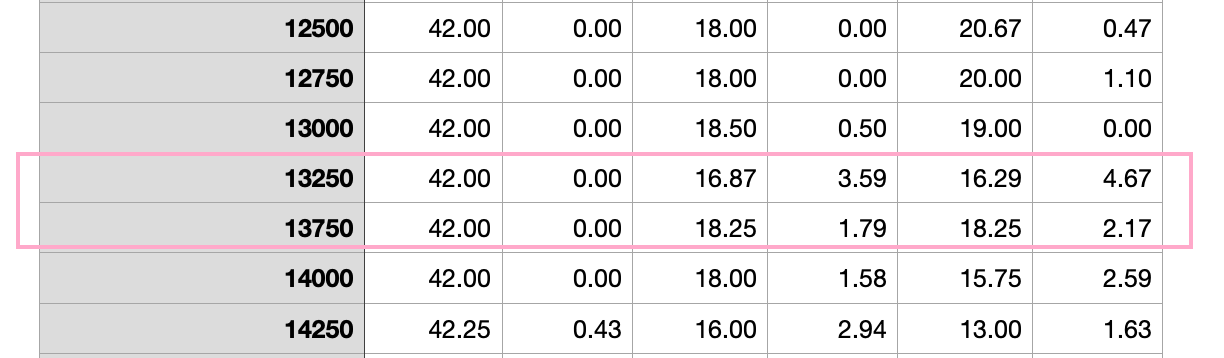
I decide to fill in with mean value.

In [68]:
# altered vaersion of dataset8.csv in sitting
file_path = f'../data/AReM/sitting/dataset8.csv'
df_sitting_8 = pd.read_csv(file_path, skiprows= 4)
df_sitting_8.rename(columns = {'# Columns: time':'time'}, inplace = True)
mean_sitting_8 = pd.DataFrame([df_sitting_8.mean()]) #calculate the mean of each column
mean_sitting_8['time'] = 13500
df_sitting_8 = pd.concat([df_sitting_8.iloc[:54], mean_sitting_8, df_sitting_8.iloc[54:]]).reset_index(drop=True)
df_sitting_8

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,44.00,0.71,18.75,0.43,7.75,1.30
1,250,44.00,0.00,18.50,0.50,8.67,0.47
2,500,43.75,0.83,18.00,0.00,9.67,0.94
3,750,43.75,0.43,18.25,0.43,9.00,0.00
4,1000,43.75,0.43,18.00,0.00,9.00,0.00
...,...,...,...,...,...,...,...
475,118750,42.25,0.43,18.00,0.00,16.50,1.12
476,119000,42.00,0.00,18.00,0.00,16.00,0.82
477,119250,42.50,0.50,18.00,0.00,15.25,0.43
478,119500,42.50,0.50,18.25,0.43,16.00,1.22


In [69]:
# do it again for training data of the rest activities
df_other_train = pd.DataFrame()

for i in other_activities: 
    for j in range(4,16): #4-15
        file_path = f'../data/AReM/{i}/dataset{j}.csv'
        
        if file_path == '../data/AReM/sitting/dataset8.csv': # special handle for dataset8.csv in sitting
            df_other_train = pd.concat([df_other_train, df_sitting_8])
        else:
            df = pd.read_csv(file_path, skiprows= 4)
            df.rename(columns = {'# Columns: time':'time'}, inplace = True)
            df_other_train = pd.concat([df_other_train, df])
    
df_other_train

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,40.50,2.60,17.25,3.90,15.50,3.28
1,250,35.50,1.50,19.75,1.30,18.50,3.77
2,500,35.25,1.30,13.67,6.13,18.50,0.50
3,750,35.25,3.90,14.75,3.27,21.25,1.79
4,1000,32.25,2.49,10.67,6.60,15.50,4.39
...,...,...,...,...,...,...,...
475,118750,34.50,6.18,9.00,3.56,12.67,4.19
476,119000,25.75,6.02,13.75,2.05,16.00,1.58
477,119250,31.50,3.35,10.25,5.12,16.25,2.95
478,119500,33.75,2.77,14.00,3.24,13.75,0.43


In [70]:
df_other_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28800 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       28800 non-null  int64  
 1   avg_rss12  28800 non-null  float64
 2   var_rss12  28800 non-null  float64
 3   avg_rss13  28800 non-null  float64
 4   var_rss13  28800 non-null  float64
 5   avg_rss23  28800 non-null  float64
 6   var_rss23  28800 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.8 MB


In [71]:
# combine bending data with the rest. to both testing and training data
df_test = pd.concat([df_bending_test, df_other_test])
df_train = pd.concat([df_bending_train, df_other_train])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9120 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       9120 non-null   int64  
 1   avg_rss12  9120 non-null   float64
 2   var_rss12  9120 non-null   float64
 3   avg_rss13  9120 non-null   float64
 4   var_rss13  9120 non-null   float64
 5   avg_rss23  9120 non-null   float64
 6   var_rss23  9120 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 570.0 KB


In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33120 entries, 0 to 479
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       33120 non-null  int64  
 1   avg_rss12  33120 non-null  float64
 2   var_rss12  33120 non-null  float64
 3   avg_rss13  33120 non-null  float64
 4   var_rss13  33120 non-null  float64
 5   avg_rss23  33120 non-null  float64
 6   var_rss23  33120 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.0 MB


#### (c) Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.
#### (i) Research what types of time-domain features are usually used in time series classification and list them
Common statistical time-domain features are as follows:
- Minimum
- Maximum
- Mean
- Median
- Standard Deviation
- Variance
- Range
- First Quartile
- Third Quartile
- Interquartile range (IQR)
- Skewness
- Kurtosis
- Root Mean Square (RMS)
- Mean Absolute Deviation (MAD)

#### (ii) Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.
As data is cleaned up in (a), I reuse it by cutting what I want and combining them so that they are located in my expected order.

In [73]:
activities_num_data = [7, 6, 15, 15, 15, 15, 15]
all_describe = []
# bending 1
for i in range(2): #dataset1 & dataset2
    df = df_bending_test.iloc[480 * i: 480 * i + 480].copy() # Use .copy() to avoid modifying the original DataFrame
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1))  #drop unused column & row
    #in describe(), 50% is median
    # print(df)
    all_describe.append(instance_df)
for i in range(activities_num_data[0] - 2): #the rest
    df = df_bending_train.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df)
    
# bending2
for i in range(2,4): #dataset1 & dataset2
    df = df_bending_test.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df)
for i in range(activities_num_data[0] - 2, activities_num_data[0] + activities_num_data[1] - 4): #the rest
    df = df_bending_train.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df) 

# cycling
for i in range(3): #dataset1 - 3
    df = df_other_test.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df)
    
cursor = activities_num_data[2] - 3 # to record the index of training data
for i in range(cursor): # the rest
    df = df_other_train.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df)

# lying
for i in range(3,6): #dataset1 - 3
    df = df_other_test.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df)
for i in range(cursor, cursor + activities_num_data[3] - 3): # the rest
    df = df_other_train.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df)
cursor = cursor + activities_num_data[3] - 3    

# sitting
for i in range(6,9): #dataset1 - 3
    df = df_other_test.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df)
for i in range(cursor, cursor + activities_num_data[4] - 3 ): # the rest
    df = df_other_train.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df)
cursor = cursor + activities_num_data[4] - 3 

# standing
for i in range(9,12): #dataset1 - 3
    df = df_other_test.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df)
for i in range(cursor, cursor + activities_num_data[5] - 3): # the rest
    df = df_other_train.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df)
cursor = cursor + activities_num_data[5] - 3
    
# walking
for i in range(12,15): #dataset1 - 3
    df = df_other_test.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df)
for i in range(cursor, cursor + activities_num_data[6]- 3): # the rest
    df = df_other_train.iloc[480 * i: 480 * i + 480].copy()
    instance_df = pd.DataFrame(df.describe().drop('count').drop('time',axis=1)) 
    all_describe.append(instance_df)

all_describe_instance = pd.concat(all_describe, keys=[instance for instance in range(1,89)])
all_describe_instance

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
1  mean  40.624792   0.358604  19.040937   0.832542  34.311292   0.570583
   std    1.476967   0.322605   4.462952   0.965659   2.188449   0.582915
   min   37.250000   0.000000   4.000000   0.000000  27.250000   0.000000
   25%   39.250000   0.000000  16.000000   0.000000  33.000000   0.000000
   50%   40.500000   0.430000  19.250000   0.500000  35.000000   0.430000
...            ...        ...        ...        ...        ...        ...
88 min   19.250000   0.000000   6.000000   0.000000   4.670000   0.430000
   25%   31.250000   2.490000  13.670000   2.050000  13.730000   2.120000
   50%   35.000000   3.960000  15.500000   3.030000  16.000000   3.090000
   75%   38.000000   5.900000  17.330000   4.037500  17.750000   4.375000
   max   44.000000  13.860000  22.750000   9.100000  23.250000   9.000000

[616 rows x 6 columns]

Then, I transform the hierarchical row structure so that the features become columns.

In [74]:
all_describe_instance.columns = ['1', '2', '3', '4', '5', '6'] #rename to easier combine the final column names
all_describe_instance = all_describe_instance.unstack(level=1)
all_describe_instance

1                                                        2  \
         mean       std    min    25%    50%      75%    max      mean   
1   40.624792  1.476967  37.25  39.25  40.50  42.0000  45.00  0.358604   
2   42.812812  1.435550  38.00  42.00  42.50  43.6700  45.67  0.372438   
3   43.954500  1.558835  35.00  43.00  44.33  45.0000  47.40  0.426250   
4   42.179813  3.670666  33.00  39.15  43.50  45.0000  47.75  0.696042   
5   41.678063  2.243490  33.00  41.33  41.75  42.7500  45.75  0.535979   
..        ...       ...    ...    ...    ...      ...    ...       ...   
84  33.586875  4.650935  19.50  30.25  34.25  37.0000  45.33  4.576562   
85  34.322750  4.752477  19.75  31.00  35.25  38.0000  45.50  4.456333   
86  34.546229  4.842294  19.50  31.25  35.25  37.8125  46.00  4.371958   
87  34.873229  4.531720  23.50  31.75  35.25  38.2500  46.25  4.380583   
88  34.473188  4.796705  19.25  31.25  35.00  38.0000  44.00  4.359312   

                   ...      5                       6                          \
         std  min  ...    50%    75%    max      mean       std   min     25%   
1   0.322605  0.0  ...  35.00  36.00  38.25  0.570583  0.582915  0.00  0.0000   
2   0.289158  0.0  ...  33.00  34.50  38.50  0.571083  0.601010  0.00  0.0000   
3   0.338690  0.0  ...  36.00  36.50  38.50  0.493292  0.513506  0.00  0.0000   
4   0.630860  0.0  ...  35.00  36.33  38.67  0.613521  0.524317  0.00  0.0000   
5   0.405469  0.0  ...  30.00  31.25  37.50  0.383292  0.389164  0.00  0.0000   
..       ...  ...  ...    ...    ...    ...       ...       ...   ...     ...   
84  2.461077  0.0  ...  16.00  18.25  25.00  3.259729  1.640243  0.00  2.0500   
85  2.599284  0.0  ...  15.75  17.75  23.25  3.432562  1.732727  0.00  2.1575   
86  2.360448  0.0  ...  15.75  17.75  22.75  3.338125  1.656742  0.00  2.1600   
87  2.435437  0.0  ...  16.00  18.00  23.50  3.424646  1.690960  0.00  2.1700   
88  2.388746  0.0  ...  16.00  17.75  23.25  3.340458  1.699114  0.43  2.1200   

                         
     50%     75%    max  
1   0.43  1.3000   1.92  
2   0.43  1.3000   3.11  
3   0.43  0.9400   1.79  
4   0.50  1.0000   2.18  
5   0.43  0.5000   1.79  
..   ...     ...    ...  
84  3.11  4.3225   8.32  
85  3.20  4.5650   9.67  
86  3.08  4.3350  10.00  
87  3.27  4.5000   9.51  
88  3.09  4.3750   9.00  

[88 rows x 42 columns]

Afterwards, 

In [75]:
features_mapping = {
    '25%': '1st quart',
    '50%': 'median',
    '75%': '3rd quart'
}

all_describe_instance.columns = [
    f"{features_mapping.get(stat, stat)}{var}"  # Use mapped name if it exists, otherwise keep the original
    for var, stat in all_describe_instance.columns.values
]

# create the column instance as required 
all_describe_instance['Instance'] = range(1, len(all_describe_instance) + 1)
all_describe_instance = all_describe_instance[['Instance'] + all_describe_instance.columns[:-1].tolist()]

all_describe_instance       

,Instance,mean1,std1,min1,1st quart1,median1,3rd quart1,max1,mean2,std2,...,median5,3rd quart5,max5,mean6,std6,min6,1st quart6,median6,3rd quart6,max6
1,1,40.624792,1.476967,37.25,39.25,40.50,42.0000,45.00,0.358604,0.322605,...,35.00,36.00,38.25,0.570583,0.582915,0.00,0.0000,0.43,1.3000,1.92
2,2,42.812812,1.435550,38.00,42.00,42.50,43.6700,45.67,0.372438,0.289158,...,33.00,34.50,38.50,0.571083,0.601010,0.00,0.0000,0.43,1.3000,3.11
3,3,43.954500,1.558835,35.00,43.00,44.33,45.0000,47.40,0.426250,0.338690,...,36.00,36.50,38.50,0.493292,0.513506,0.00,0.0000,0.43,0.9400,1.79
4,4,42.179813,3.670666,33.00,39.15,43.50,45.0000,47.75,0.696042,0.630860,...,35.00,36.33,38.67,0.613521,0.524317,0.00,0.0000,0.50,1.0000,2.18
5,5,41.678063,2.243490,33.00,41.33,41.75,42.7500,45.75,0.535979,0.405469,...,30.00,31.25,37.50,0.383292,0.389164,0.00,0.0000,0.43,0.5000,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,33.586875,4.650935,19.50,30.25,34.25,37.0000,45.33,4.576562,2.461077,...,16.00,18.25,25.00,3.259729,1.640243,0.00,2.0500,3.11,4.3225,8.32
85,85,34.322750,4.752477,19.75,31.00,35.25,38.0000,45.50,4.456333,2.599284,...,15.75,17.75,23.25,3.432562,1.732727,0.00,2.1575,3.20,4.5650,9.67
86,86,34.546229,4.842294,19.50,31.25,35.25,37.8125,46.00,4.371958,2.360448,...,15.75,17.75,22.75,3.338125,1.656742,0.00,2.1600,3.08,4.3350,10.00
87,87,34.873229,4.531720,23.50,31.75,35.25,38.2500,46.25,4.380583,2.435437,...,16.00,18.00,23.50,3.424646,1.690960,0.00,2.1700,3.27,4.5000,9.51


#### (iii) Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [76]:
# standard deviation of each of the time-domain features
all_feature_std = pd.DataFrame(all_describe_instance.iloc[:, 1:].std(), columns=['std'])
all_feature_std

,std
mean1,5.335718
std1,1.772166
min1,9.569975
1st quart1,6.153590
median1,5.440054
3rd quart1,5.138925
max1,4.394362
mean2,1.574164
std2,0.884108
min2,0.000000


In [77]:
all_ci_lower = []
all_ci_upper = []
for i in range(1, len(all_describe_instance.columns)):
    data = all_describe_instance.iloc[:, i].dropna().to_numpy()
    
    # Check if the array contains any variability
    if np.all(data == 0):
        print(f"Skipping column {i} due to all-zero values")
        all_ci_lower.append(0) # append trivial CI for all-zero data
        all_ci_upper.append(0)
        continue
        
    boot_result = bootstrap((data,), statistic = np.std, confidence_level= 0.90, n_resamples=999)
    all_ci_lower.append(boot_result.confidence_interval[0])
    all_ci_upper.append(boot_result.confidence_interval[1])

Skipping column 10 due to all-zero values
Skipping column 24 due to all-zero values


In [78]:
# combine with previous std dataFrame
all_feature_std['lower ci'] = all_ci_lower
all_feature_std['upper ci'] = all_ci_upper
all_feature_std

,std,lower ci,upper ci
mean1,5.335718,4.810579,5.996269
std1,1.772166,1.596357,1.983202
min1,9.569975,8.462290,10.960065
1st quart1,6.153590,5.608749,6.757773
median1,5.440054,4.917181,6.166872
3rd quart1,5.138925,4.433548,5.943620
max1,4.394362,3.511668,5.613292
mean2,1.574164,1.392418,1.705618
std2,0.884108,0.810187,0.944359
min2,0.000000,0.000000,0.000000


#### (iv) Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).
In terms of time-domain features, I think mean, standard deviation and median can be the three most important ones. <br>
The reason for mean is because it provides average value of the data. Standard deviation, on the other hand, provides the amount of fluctuation in the data points. Lastly, median is the best feature to show the central of data which will not be affected by outliers.

## 2. ISLR 3.7.4
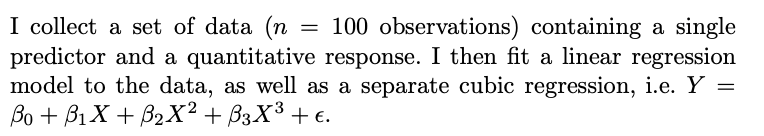
#### (a)
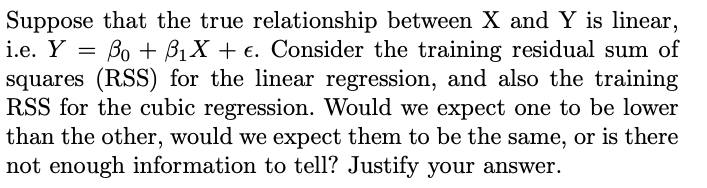
The true connection between X and Y is linear, which leads to the result that cubic regression model would overfit the data. Therefore, it will behave better on training data, leading to a lower RSS.
<b> Training RSS: Linear Regression > Cubic Regression </b>

#### (b)
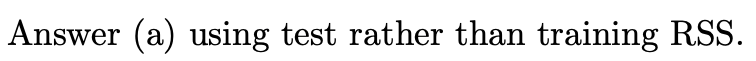
As mentioned in (a), cubic regression model is overfitting, and that it is going to behave poorly on testing data. Hence, it has higher RSS.
<b> Testing RSS: Linear Regression < Cubic Regression </b> 
    
#### (c)
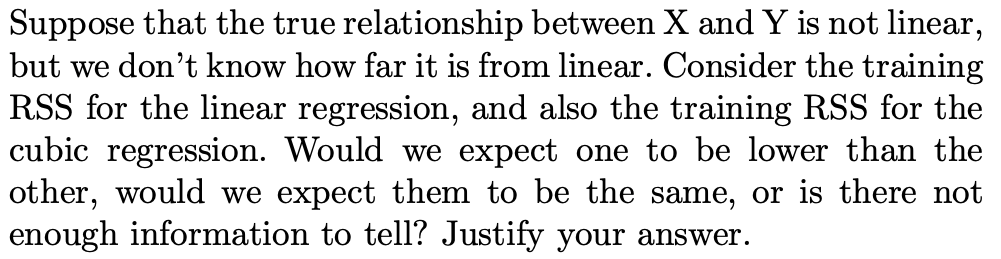
In terms of training RSS, it will always decreases when the model flexibility increases. Thus, in this case, even though we don't know the exact trey relationship between X and Y, cubic regression model still behaves better than linear regression model on training.
<b> Training RSS: Linear Regression > Cubic Regression </b> 
                                             
#### (d)

It depends. We cannot tell in terms of testing RSS when we don't know the underlying relationship between X and Y. If it is more linear, linear regression model will perform better on testing, leading to lower testing RSS. Otherwise, it would be either cubic regression model having lower testing RSS or both of them perform poorly.